### Dataset Information
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  

Source: https://archive.ics.uci.edu/dataset/45/heart+disease

In [83]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [84]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

Let's take a look at the first few rows of the dataset to understand its structure and contents. We'll display both the features and the target variable.

In [85]:
import pandas as pd

# Display the first few rows of the features and target
display(pd.concat([X, y], axis=1).head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


To perform data wrangling, we will handle missing values, encode categorical variables, and scale numerical features if necessary. Let's start by checking for missing values and then proceed with encoding and scaling.

In [86]:
# Check for missing values in the dataset
missing_values = X.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values

ca      4
thal    2
dtype: int64

Next, we will encode categorical variables. Since the dataset has already been transformed to include dummy variables, we can skip this step. However, if there are any categorical variables left, we would use one-hot encoding or label encoding as appropriate.

Now, let's scale the numerical features to ensure they are on a similar scale, which can be important for some machine learning algorithms.

In [87]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
display(X_scaled_df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.718306,0.653650
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.487269,-0.895552
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.418744,1.170051
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.718306,-0.895552
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.718306,-0.895552


## Exploratory Data Analysis (EDA)

Let's perform some exploratory data analysis (EDA) to understand the dataset better. We will look at the distribution of numerical features, check for correlations, and visualize some of the data.

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Display the first few rows of the dataset
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


### Summary Statistics

Let's look at the summary statistics of the dataset to understand the central tendency, dispersion, and shape of the dataset's distribution.

In [89]:
# Summary statistics
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


### Distribution of Numerical Features

We will plot histograms for each numerical feature to understand their distributions.

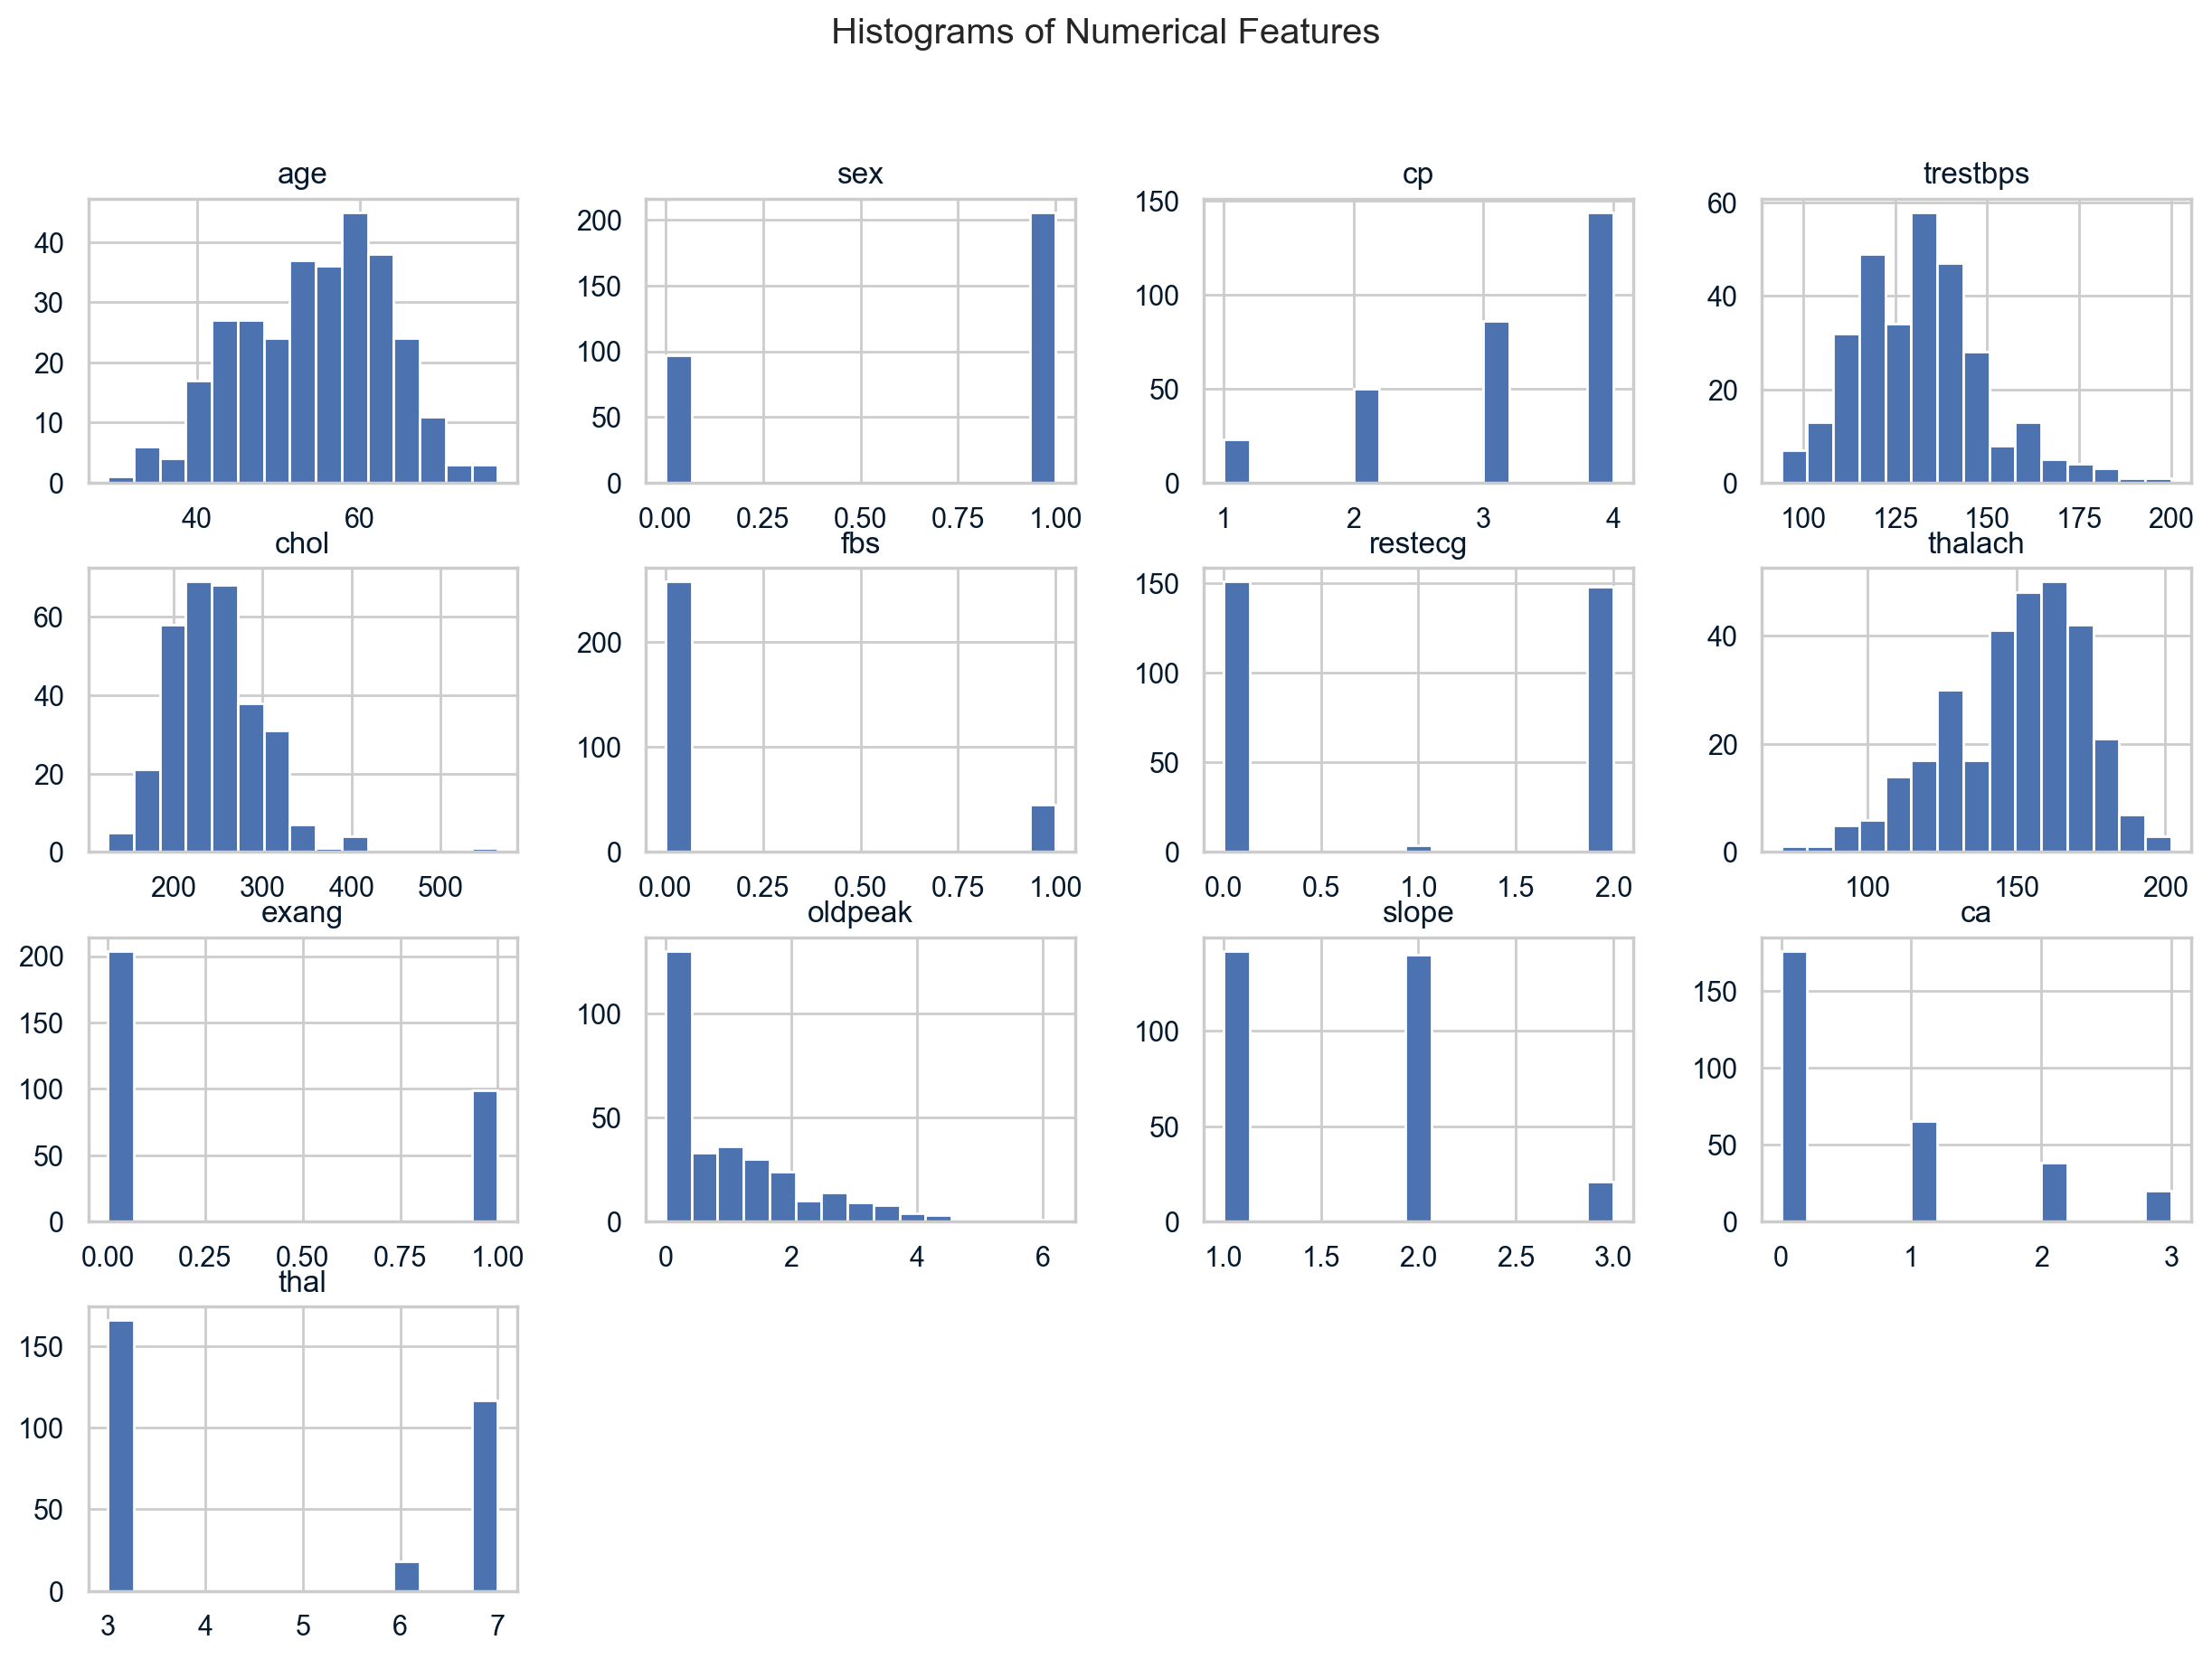

In [90]:
# Plot histograms for each numerical feature
X.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()

### Correlation Matrix

Let's compute the correlation matrix to understand the relationships between different features.

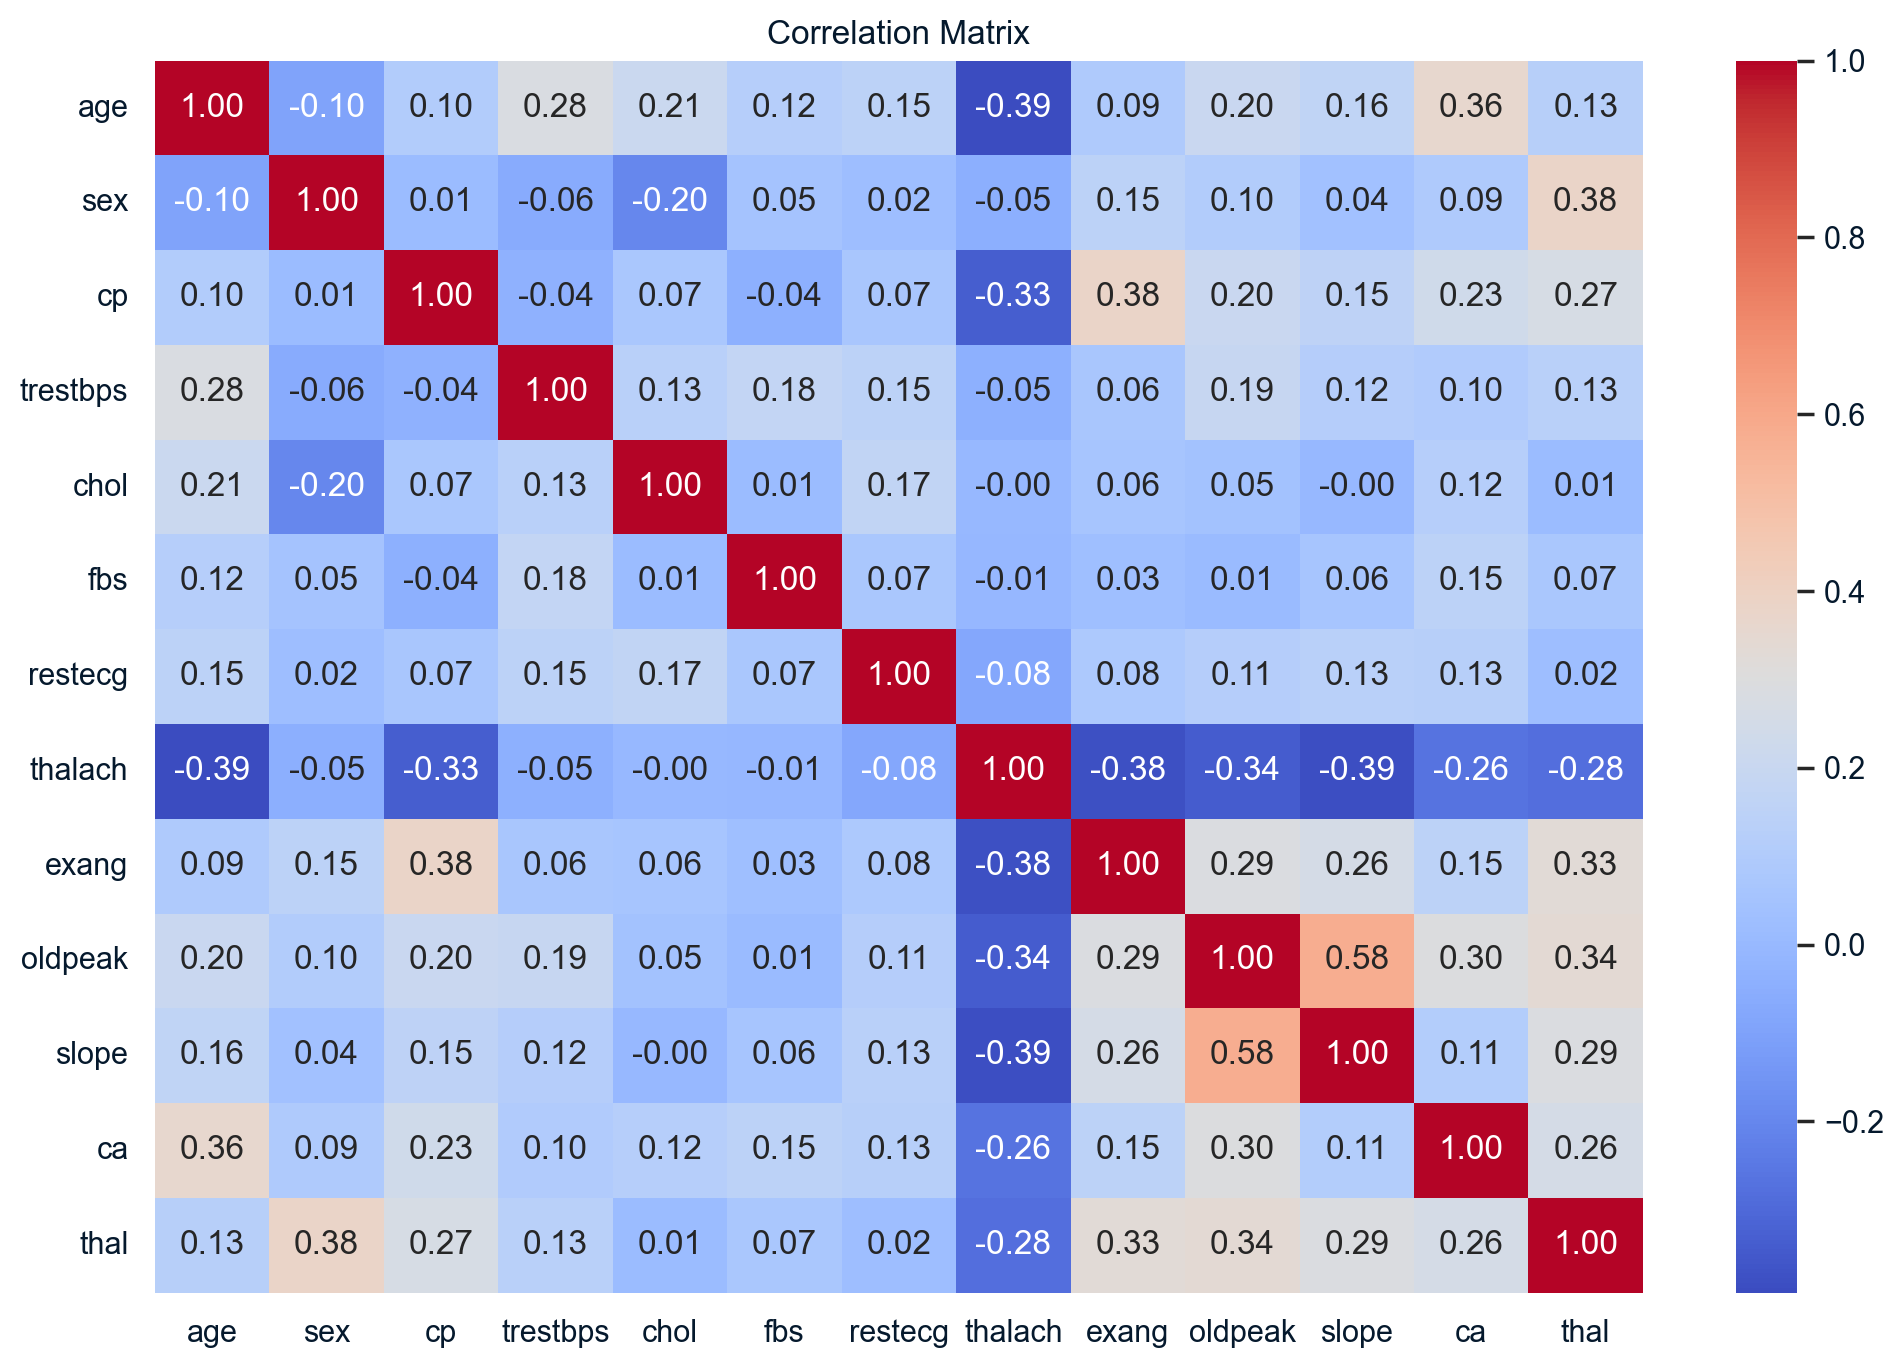

In [91]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Pairplot

A pairplot will help us visualize the pairwise relationships between features and the distribution of single variables.

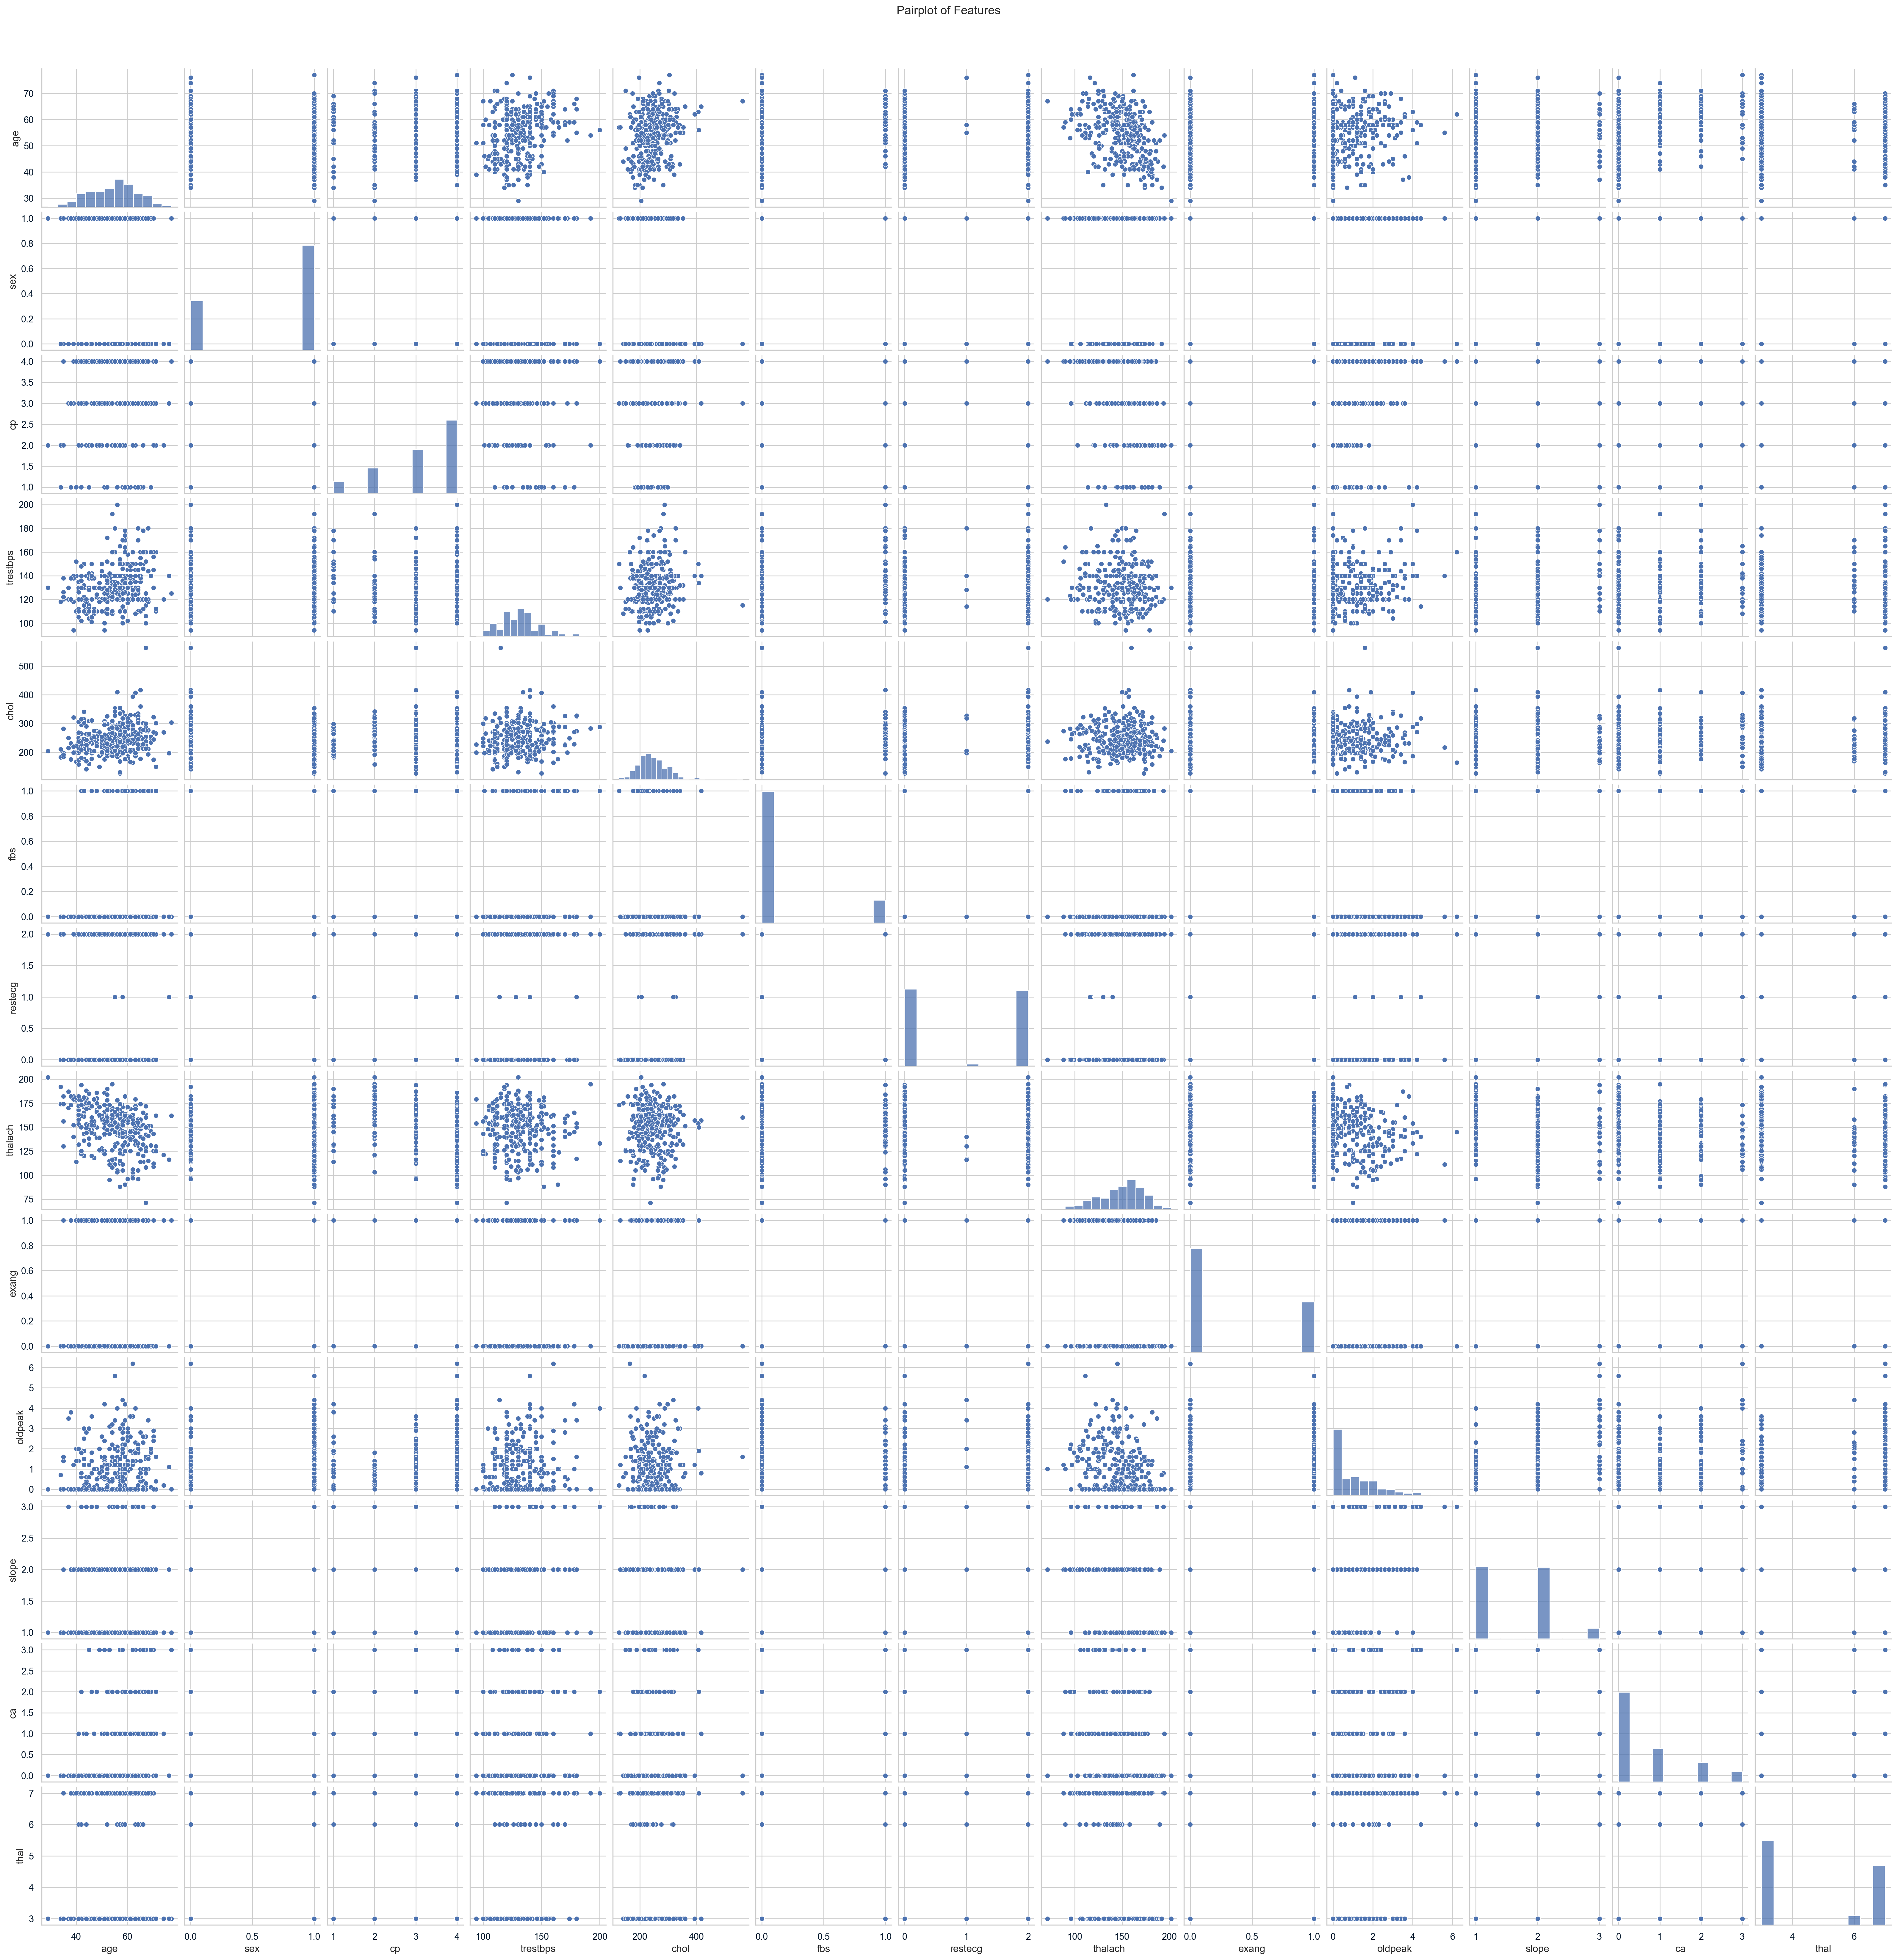

In [92]:
# Pairplot
sns.pairplot(X)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [93]:
# Create dummy variables for categorical features
X_dummies = pd.get_dummies(X, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

# Display the first few rows of the new DataFrame with dummy variables
display(X_dummies.head())

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_2,cp_3,cp_4,fbs_1,restecg_1,restecg_2,exang_1,slope_2,slope_3,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,True,False,False,False,True,False,True,False,False,True,True,False
1,67,160,286,108,1.5,3.0,True,False,False,True,False,False,True,True,True,False,False,False
2,67,120,229,129,2.6,2.0,True,False,False,True,False,False,True,True,True,False,False,True
3,37,130,250,187,3.5,0.0,True,False,True,False,False,False,False,False,False,True,False,False
4,41,130,204,172,1.4,0.0,False,True,False,False,False,False,True,False,False,False,False,False


We have already scaled the numerical features using `StandardScaler` in a previous step. However, if you want to use a different scaler or reapply the scaling, you can follow the steps below.

In [94]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the features
X_min_max_scaled = min_max_scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_min_max_scaled_df = pd.DataFrame(X_min_max_scaled, columns=X.columns)

# Display the first few rows of the scaled features
display(X_min_max_scaled_df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00


To split the data into training and testing datasets, we can use the `train_test_split` function from the `sklearn.model_selection` module. This function allows us to specify the proportion of the dataset to include in the test split and shuffles the data before splitting.

In [95]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_min_max_scaled_df, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13)

(61, 13)

(242, 1)

(61, 1)

## Overview of the Data and Analysis Steps

### Data Description
The dataset consists of several features related to patient health metrics, which are used to predict the presence of heart disease. The features include:
- **age**: Age of the patient
- **sex**: Gender of the patient
- **cp**: Chest pain type
- **trestbps**: Resting blood pressure
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels colored by fluoroscopy
- **thal**: Thalassemia

The target variable is **num**, which indicates the presence of heart disease.

### Data Analysis Steps
1. **Data Preprocessing**: 
   - The features were scaled using Min-Max scaling to normalize the data. This step ensures that each feature contributes equally to the analysis and helps improve the performance of machine learning models.

2. **Data Splitting**:
   - The dataset was split into training and testing sets using an 80-20 split. This allows us to train the model on one portion of the data and test its performance on unseen data.

### Final Outcome
The data is now preprocessed and split into training and testing sets, ready for building and evaluating machine learning models to predict heart disease. The next steps would typically involve selecting a suitable model, training it on the training data, and evaluating its performance on the test data.

Fit models with a training dataset


Let's fit some machine learning models using the training dataset. We will use the `X_min_max_scaled_df` for the features and `y_train` for the target variable. We'll start by importing the necessary libraries and then fit a few models.

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Splitting the scaled features into training and testing sets
X_train, X_test = train_test_split(X_min_max_scaled_df, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Fit models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Print a message indicating completion
print("Models have been fitted to the training data.")

Models have been fitted to the training data.


 Identify the final model that you think is the best model for this project

To identify the best model for this project, we need to evaluate the performance of each model on the test dataset. We will use metrics such as accuracy, precision, recall, and F1-score to compare the models. Let's proceed with evaluating the models.

In [105]:
# Evaluate models on the test set

# Predict using the test set
logistic_pred = logistic_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, logistic_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print accuracy
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Print classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, random_forest_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))

Logistic Regression Accuracy: 0.54
Random Forest Accuracy: 0.49
SVM Accuracy: 0.54

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.50      0.25      0.33        12
           2       0.22      0.22      0.22         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.30      0.29      0.28        61
weighted avg       0.49      0.54      0.50        61


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.10      0.08      0.09        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy      

Based on the provided variables and context, it appears that your data is not explicitly structured for time series or forecasting tasks. The variables `X` and `y` seem to represent features and target labels for a classification problem, as indicated by the use of models like logistic regression, random forest, and SVM.

In time series or forecasting tasks, data is typically organized with a time component, and models are trained to predict future values based on past observations. This often involves using time-based features and ensuring that the train-test split respects the temporal order of the data.

Since your data does not include a time component and you are using classification models, it seems you are working on a classification problem rather than a time series or forecasting problem. Therefore, the standard train-test split approach you are using is appropriate for your task.

The response variable `y` (and `y_test`) is categorical. This is indicated by the column `num` having a data type of `int64`, which typically represents discrete categories or classes in a classification problem. In contrast, a continuous response variable would usually be represented by a `float` data type, indicating a range of continuous values.